<h1>Laboration 1 - Numerisk lösning av ekvationer</h1>

<h2>Inledning</h2>

<p>I denna laboration ska vi titta på numeriska metoder för att lösa ekvationer, dvs. beräkna nollställen till funktioner. För att ta reda på hur många nollställen en funktion har och ungefär var de befinner sig behöver vi rita (delar av) grafen till funktionen i fråga. Därefter beräknar vi noggranna närmevärden till de nollställen vi är intresserade av.</p>

<p>Som exempel kan vi ta ekvationen $$f(x)=(x-2.5)e^{-0.5(x-2)^2}+0.2=0.$$ Vi börjar med att rita grafen till $f$ för att skaffa oss en uppfattning om hur många nollställen funktionen har och var de ligger.

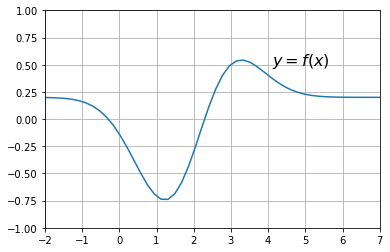

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-2,7) #Skapar en lista med x-värden
y=(x-2.5)*np.exp(-0.5*(x-2)**2)+0.2 #Beräknar motsvarande funktionsvärden y=f(x)

plt.plot(x,y)
plt.text(4.1,0.5, "$y=f(x)$",fontsize=16) #Text vid grafen
plt.axis([-2,7,-1,1]) #Anger gränser för x och y i fönstret
plt.grid() #Aktiverar rutnät

<p>Lösningarna till ekvationen $f(x)=0$ svarar mot de punkter där grafen skär x-axeln, så kallade nollställen till $f$. Vi ser att vi har två nollställen, ett i intervallet $[-1,0]$ och ett i intervallet [2,3].</p>

<p>I ovanstående plot kan vi läsa av approximationer till nollställena men noggrannheten kommer inte bli särskilt hög. Istället behöver vi en metod som stegvis kan förbättra en approximation tills den blir tillräckligt noggrann. Intervallhalveringsmetoden (eller bisektionsmetoden) är en sådan metod.</p>

<p>Metoden bygger på följande resonemang: Om en funktion $f$ växlar tecken på ett intervall $[a,b]$ och om $f$ är kontinuerlig så säger satsen om mellanliggande värden att $f$ måste ha minst ett nollställe i intervallet. Delar vi intervallet i mitten, så att vi får två delintervall, kommer vi fortfarande ha en teckenväxling i något av delintervallen.</p>

<p>Vi behåller detta delintervall, som kommer innehålla minst ett av nollställena till $f$, och upprepar resonemanget tills vi har erhållit tillräcklig noggranhet, dvs. intervallet är tillräckligt litet.</p>

<p> Intervallhalveringsmetoden är enkel och pålitlig men tyvärr också långsam. Det krävs vanligtvis väldigt många iterationer för att erhålla tillräcklig noggrannhet i en approximation av en lösning till $f(x)=0$. I ett senare avsnitt skall vi studera Newtons metod som bygger på successiva approxiamtioner av funktionen $f(x)$ med så kallade linjäriseringar (tangenter). Newton Raphsons metod är mycket snabbare än intervallhalveringsmetoden men kräver å andra sidan en tillräckligt bra första approxiamtion av en lösning.</p>

<h2>Intervallhalveringsmetoden</h2>

<p>Antag att funktionen $f(x)$ är kontinuerlig. Starta med ett intervall $[a,b]$ där $f(x)$ växlar tecken, vilket innebär att $f(a)\cdot f(b)<0$. Enligt antagande så har $f$ minst ett nollställe i $[a,b]$. Bilda mittpunkten $m=(a+b)/2$ och dela in intervallet i två lika långa delintervall $[a,m]$ och $[m,b]$.</p>

<p>Vi behåller delintervallet där $f(x)$ växlar tecken, dvs. $[a,m]$ om $f(a)\cdot f(m)<0$ och annars $[m,b]$. I exemplet nedan behåller vi alltså det vänstra delintervallet $[a,m]$.</p>

<center><img src="https://canvas.gu.se/files/5075418/download?download_frd=1"></center>

<p>Vi upprepar detta förfarande tills vi har ett intervall som är tillräckligt smalt, dvs. vi har stängt in nollstället med tillräcklig noggrannhet.</p>

<p>För en mer detaljerad beskrivning av intervallhalveringsmetoden se t.ex. Avsnitt 2.5.2 i Persson-Böiers.</p>

<b>Uppgift 1:</b> Definiera funktionen $f(x)=(x-2.5)e^{-0.5(x-2)^2}+0.2$ som en lambdafunktion (lambda function) i Python och rita sedan grafen av $y=f(x)$ för $-1\leq x\leq 5$.

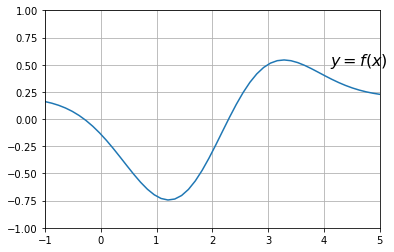

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-1,5)       # a list of x-value
LampdaFunc = lambda x:(x-2.5)*np.exp(-0.5*(x-2)**2)+0.2      #corresponding valuesto func y = f (x)
    
plt.plot(x,LampdaFunc(x)) 
plt.text(4.1,0.5, "$y=f(x)$",fontsize=16) 
plt.axis([-1,5,-1,1]) 
plt.grid() #Aktiverar rutnät

<p><b>Uppgift 2:</b> Vi ser att $f$ har ett nollställe i $[-1,0]$.<br>

Skriv följande i Python-kod:
    
a. Låt $a=-1$ och $b=0$.

b. Avgör om $f$ växlar tecken på $[a,b]$ genom att beräkna $f(a)\cdot f(b)$.

c. Bilda mittpunkten $m$ till $[a,b]$.

d. Om $f$ växlar tecken på $[a,m]$, låt $b=m$, annars låt $a=m$, dvs. det delintervall där teckenväxlingen sker.
</p>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def intervall_halverings_metoden(f,a,b):
    fa = f(a)
    fb = f(b)
    
    if fa*fb > 0:
        print("f(a) and f(b) must have different signs")
        return None
    
    for _ in range(100):
        
        m = (a + b) /2
        fm =f(m)
        
        if fm == 0:
            #return m            
            break
        
        if fa*fm > 0:
            a = m
            fa = fm
            
        if fb*fm > 0:
            b = m
            fb = fm
            
    return m        
 
LampdaFunc = lambda x:(x-2.5)*np.exp(-0.5*(x-2)**2)+0.2 #corresponding valuesto func y = f (x)
x = intervall_halverings_metoden(LampdaFunc,-1,0)
print("Solution Found: {} ".format(x))

Solution Found: -0.2969385526846928 


<p><b>Uppgift 3:</b> Skriv en funktion (ej lambdafunktion) som löser ekvationen $f(x)=0$ genom intervallhalvering. Funktionen skall heta <b>min_bisect</b> och anropas med tre argument: en (lambda)funktion som beräknar $f(x)$, ett intervall $[a,b]$ där $f(x)$ växlar tecken samt noggranheten med vilken lösningen skall bestämmas. Som utdata skall <b>min_bisect</b> ge mittpunkten $m$ i det senaste intervall som innehåller nollstället.</p>

In [5]:
def min_bisect(f,a,b):
    fa = f(a)
    fb = f(b)
    
    if fa*fb > 0:
        print("f(a) and f(b) must have different signs")
        return None
    
    for _ in range(100):
        
        m = (a + b) /2
        fm =f(m)
        
        if fm == 0:
            #return m            
            break
        
        if fa*fm > 0:
            a = m
            fa = fm
            
        if fb*fm > 0:
            b = m
            fb = fm
            
    return m        
 
my_y = lambda x:(x-2.5)*np.exp(-0.5*(x-2)**2)+0.2 #corresponding valuesto func y = f (x)
x_3 = min_bisect(my_y,-1,0)
print("Solution Found: {} ".format(x_3))


Solution Found: -0.2969385526846928 


<p><b>Uppgift 4:</b> Använd nu din funktion <b>min_bisect</b> för att beräkna båda nollställena till funktionen i Uppgift 1 med fem decimalers noggrannhet. Kontrollera att svaren är rimliga!</p>

In [6]:
# Skriv din kod här.
def min_bisect(f,a,b,tolerance = 1e-10):
    fa = f(a)
    if abs(fa) < tolerance:
        return a
    
    fb = f(b)
    if abs(fb) < tolerance:
        return b
    
    
    if fa*fb > 0:
        print("f(a) and f(b) must have different signs")
        return None
    
    for _ in range(100):
        
        m = (a + b) /2
        fm =f(m)
        
        if abs(b - a) < tolerance:
            break
        
        if abs(fm) < tolerance: #fm == 0:
            #return m            
            break
        
        if fa*fm > 0:
            a = m
            fa = fm
            
        if fb*fm > 0:
            b = m
            fb = fm
            
    return m        
 
y = lambda x:(x-2.5)*np.exp(-0.5*(x-2)**2)+0.2 #corresponding valuesto func y = f (x)
_x_ = min_bisect(y,-1,0)
print("Solution Found: x = {}, f(x) = {} ".format(round(_x_,5),round(y(_x_), 5) ))

Solution Found: x = -0.29694, f(x) = -0.0 


<p><b>Uppgift 5:</b> Projektilbanan för en projektil såsom en kastad sten eller boll ges, om vi bortser från luftmotståndet, av $$y(x)=y_0-\frac{g}{2v_0^2\cos^2\theta}\left(x-\frac{v_0^2\sin(2\theta)}{2g}\right)^2+\frac{v_0^2\sin^2\theta}{2g}$$ där $y_0$ är utgångshöjden, $v_0$ utgångsfarten, $\theta$ utkastvinkeln och $g$ tyngdaccelerationen vid jordytan (som kan antas vara $9.81\, m/s^2$).</p>

<p>Antag att $y_0=1.85\, m$, $v_0=10\, m/s$ och $\theta=45^\circ$. Motsvarande projektilbana beskrivs av följande Python-funktion:</p>

In [1]:
def projektilbanan(x):
    y0=1.85; v0=10; theta=45; g=9.81 #Antaganden
    t=theta*np.pi/180 #Konvertering från grader till radianer
    a=g/(2*v0**2*np.cos(t)**2); b=v0**2*np.sin(2*t)/(2*g); c=v0**2*np.sin(t)**2/(2*g)
    
    return y0-a*(x-b)**2+c #Returnerar projektilens höjd vid (horisontellt) avstånd x från utkastpunkten
    

<p>Använd funktionen <b>projektilbanan</b> för att rita en graf av projektilbanan så att du ser ungefär var projektilen slår ned i marken. Använd sedan din funktion <b>min_bisect</b> för att bestämma nedslagspunkten noggrant. Kom ihåg att kontrollera att ditt svar är rimligt!</p>

Solution Found: x2 = -1.59914, f(x) = -0.0 


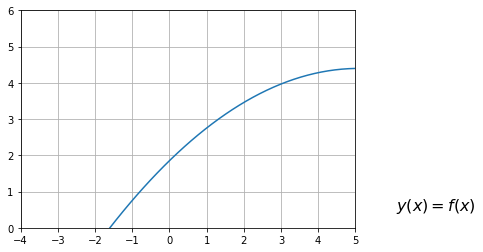

In [8]:
# Skriv din kod här.

def projektilbanan(x):
    y0=1.85;
    v0=10; 
    theta=45; 
    g=9.81 #Antaganden
    
    t=theta*np.pi/180 #Konvertering från grader till radianer
    
    a=g/(2*v0**2*np.cos(t)**2);
    b=v0**2*np.sin(2*t)/(2*g);
    c=v0**2*np.sin(t)**2/(2*g)
    
    return y0-a*(x-b)**2+c #Returnerar projektilens höjd vid (horisontellt) avstånd x från utkastpunkten

def draw_graf():
    x = np.linspace(-4,5) # a list of x-value
    plt.plot(x,projektilbanan(x)) # plot values of (x,y)
    plt.text(6.1,0.5, "$y(x)=f(x)$",fontsize=16) 
    plt.axis([-4,5,0,6]) 
    plt.grid() #Aktiverar rutnät
    
    x2 = min_bisect(projektilbanan,-2,-1)
    print("Solution Found: x2 = {}, f(x) = {} ".format(round(x2,5),round(projektilbanan(x2), 5) ))
    
draw_graf()

<h2>Newton-Raphsons metod</h2>

Antag att $x_k$ är en approximation av ett nollställe till funktionen $f$. Följ tangenten till kurvan $y=f(x)$ i punkten $(x_k,f(x_k))$, som ges av ekvationen $$y=f(x_k)+f^\prime(x_k)(x-x_k),$$ till $x$-axeln ($y=0$) och tag skärningspunktens $x$-koordinat $$x_{k+1}=x_k-\frac{f(x_k)}{f^\prime(x_k)}$$ som ny approximation av nollstället.

<p>Låt oss titta på följande exempel: Lös ekvationen $f(x)=0$ då $f(x)=e^{2x}-2\sin x-3$. Nedanstående graf visar att vi har ett nollställe i intervallet $[0.5,1]$.</p>

<center><img src="https://canvas.gu.se/files/5075417/download?download_frd=1"></center>

<p>Vi väljer som första approximation $x_0=0.5$ och bildar tangenten $y=f(x_0)+f^\prime(x_0)(x-x_0)$ till funktionskurvan $y=f(x)$ i punkten $x=x_0$ och tar dess skärningspunkt med $x$-axeln som ny approximation $$x_1=x_0-\frac{f(x_0)}{f^\prime(x_0)},$$ vilken i detta fall ges av $x_1=0.83698...$</p>

<p>Genom att bilda tangenten $y=f(x_1)+f^\prime(x_1)(x-x_1)$ i $x_1$ och beräkna skärningspunkten med $x$-axeln $$x_2=x_1-\frac{f(x_1)}{f^\prime(x_1)}$$ erhåller vi nästa approximation $x_2=0.74606...$.</p>

<center><img src="https://canvas.gu.se/files/5075419/download?download_frd=1"></center>

<p>Genom att fortsätta på samma sätt att bilda tangenter och beräkna skärningspunkter med $x$-axeln producerar vi följande tabell:</p>

<table>
<tr>
<td>$k$</td>
<td>$x_k$</td>
<td>$f(x_k)$</td>
</tr>
<tr>
<td>$0$</td>
<td>$0.5$</td>
<td>$-1.240569248749361$</td>
</tr>
<tr>
<td>$1$</td>
<td>$0.8369831431133126$</td>
<td>$0.8480270253378368$</td>
</tr>    
<tr>
<td>$2$</td>
<td>$0.7460628299921155$</td>
<td>$0.08903190514055259$</td>
</tr>    
<tr>
<td>$3$</td>
<td>$0.7340709363250909$</td>
<td>$0.0013658951749833115$</td>
</tr>    
<tr>
<td>$4$</td>
<td>$0.7338811605408527$</td>
<td>$3.3677753874528094e-07$</td>
</tr>
</table>

<p>Notera att redan efter $4$ iterationer har vi uppnått en hög noggranhet.</p>

<p>I avsnitt 4.5 i Persson-Böiers diskuteras iterationsmetoder för numerisk lösning av ekvationer i allmänhet och Newton-Raphsons metod i synnerhet.</p>

<p><b>Uppgift 6:</b> Beräkna lösningarna till ekvationen $f(x)=0$ för $f(x)=x^3-\cos(4x)$. Börja med att rita upp grafen till $f$ och läs av ungefär var lösningarna, dvs. skärningspunkterna mellan grafen och $x$-axeln, befinner sig. Använd sedan Newton-Raphsons metod för att mer noggrannt beräkna alla lösningar.</p>

fx 7.2695599540040234e-12 
Solution: x = 0.3790743428184616, f(x) = 7.2695599540040234e-12


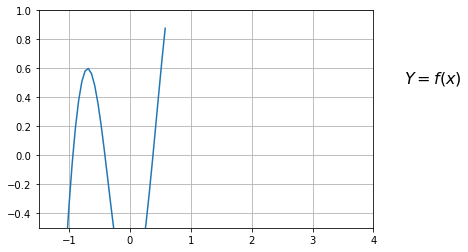

In [9]:
# Skriv din kod här.
def derivative(f, x, dx = 1e-6):
    df = f(x + dx) - f(x - dx)
    return df/(2*dx)

def newton_raphsons(f, x0, tol = 1e-10, maxit = 100): #tol:tolerance

    x = x0
    fx = f(x)

    for _ in range(maxit):

        if abs(fx) < tol:
            print("fx {} ".format(fx))
            break
        
        fpx = derivative(f, x)
        if abs(fpx) < tol:
            print("fpx {} ".format(fx))
            break

        x = x - fx/fpx
        fx = f(x)

    return x

func = lambda x: x**3 - np.cos(4*x)

def draw_newton_graf():
    x = np.linspace(-2,0.58) # a list of x-value
    plt.plot(x,func(x)) # plot values of (x,y)
    plt.text(4.5,0.5, "$Y=f(x)$",fontsize=16) 
    plt.axis([-1.5,4,-0.5,1]) 
    plt.grid() #Aktiverar rutnät
    
    x0 = 0.5
    x_k = newton_raphsons(func, x0, tol = 1e-10, maxit = 100)
    print("Solution: x = {}, f(x) = {}".format(x_k, func(x_k)))
    
draw_newton_graf()

<p>Det är ofta praktiskt att paketera en metod i en funktion som utför metoden. I föregående avsnitt gjorde vi detta för intervallhalveringsmetoden och nu ska vi göra det för Newton-Raphsons metod.</p>

<p><b>Uppgift 7:</b> Skriv en funktion som löser ekvationen $f(x)=0$ med hjälp av Newton-Raphsons metod. Funktionen skall heta <b>min_NewtonRaphson</b> och anropas enligt <b>min_NewtonRaphson(f,Df,x0,tol)</b>, där <b>f</b> och <b>Df</b> är två funktioner som beräknar $f(x)$ respektive $f^\prime(x)$, <b>x0</b> är en strartapproximation av lösningen och <b>tol</b> ett tal som anger önskad noggrannhet.</p>

Solution: x = 5.751132903242251e-11, f(x) = 5.751132903242251e-11


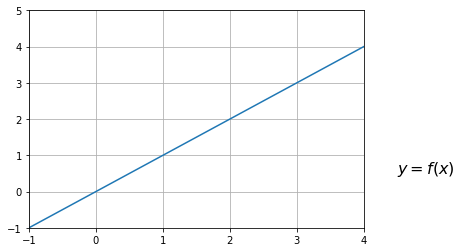

In [4]:
# Skriv din kod här.
import matplotlib.pyplot as plt
import numpy as np
def derivative_function(f, x, dx = 1e-6):
    df = f(x + dx) - f(x - dx)
    return df/(2*dx)

def min_NewtonRaphson(f,Df,x0,tol = 1e-10):
    x = x0
    fx = f(x)

    for _ in range(100):

        if abs(fx) < tol:
            #print("fx {} ".format(fx))
            break
        
        fpx = Df(f, x)
        if abs(fpx) < tol:
            #print("fpx {} ".format(fx))
            break

        x = x - fx/fpx
        fx = f(x)

    return x

func_7 = lambda x: x
def draw_min_NewtonRaphson_graf():
    x = np.linspace(-1,5) # a list of x-value
    plt.plot(x,func_7(x)) # plot values of (x,y)
    plt.text(4.5,0.5, "$y=f(x)$",fontsize=16) 
    plt.axis([-1,4,-1,5]) 
    plt.grid() #Aktiverar rutnät
    
    x0 = 2
    x_k = min_NewtonRaphson(func_7,derivative_function,x0, tol = 1e-10)
    print("Solution: x = {}, f(x) = {}".format(x_k, func_7(x_k)))
    
draw_min_NewtonRaphson_graf()

<p><b>Uppgift 8:</b> Testa nu din funktion <b>min_NewtonRaphson</b> på följande funktioner genom att rita grafer samt beräkna samtliga nollställen:

a. $f(x)=0.5(x-2)^2-2\cos(2x)-1.5$,
    
b. $f(x)=x^3-\cos(4x)$.
</p>

Solution: x = 1.9330107072831684, f(x) = 0.0


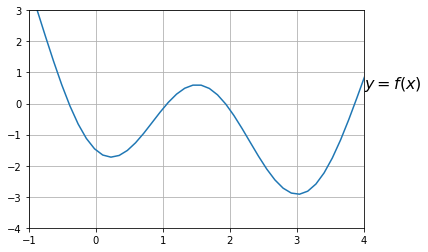

In [6]:
# Skriv din kod här.
func_8_a = lambda x: 0.5*(x-2)**2-2*np.cos(2*x)-1.5
""" upp.8_A"""
def draw_min_NewtonRaphson_8_a_graf():
    x = np.linspace(-1,5) # a list of x-value
    plt.plot(x,func_8_a(x)) # plot values of (x,y)
    plt.text(4,0.5, "$y=f(x)$",fontsize=16) 
    plt.axis([-1,4,-4,3]) 
    plt.grid() #Aktiverar rutnät
    
    x0 = 2
    x_k = min_NewtonRaphson(func_8_a,derivative_function,x0, tol = 1e-10)
    print("Solution: x = {}, f(x) = {}".format(x_k, func_8_a(x_k)))
    
draw_min_NewtonRaphson_8_a_graf()



Solution: x = -0.936805341540741, f(x) = -1.1102230246251565e-16


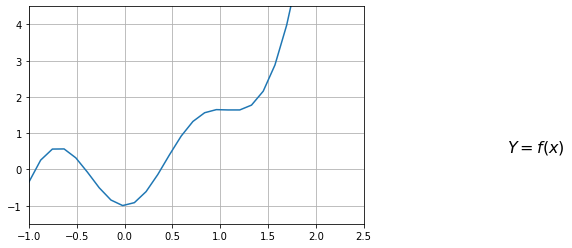

In [7]:
""" upp.8_B"""
func_8_b = lambda x: x**3-np.cos(4*x)
def draw_min_NewtonRaphson_8_b_graf():
    x = np.linspace(-1,5) # a list of x-value
    plt.plot(x,func_8_b(x)) # plot values of (x,y)
    plt.text(4,0.5, "$Y=f(x)$",fontsize=16) 
    plt.axis([-1,2.5,-1.5,4.5]) 
    plt.grid() #Aktiverar rutnät
    
    x0 = 2
    x_k = min_NewtonRaphson(func_8_b,derivative_function,x0, tol = 1e-10)
    print("Solution: x = {}, f(x) = {}".format(x_k, func_8_b(x_k)))
    
draw_min_NewtonRaphson_8_b_graf()